run

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Importing all the requires modules and packages





run

In [ ]:
import os
import cv2
import sys
import json
import random
import imageio
import warnings
import PIL.Image
import imutils
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm import tqdm
from itertools import chain
from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize
from skimage.morphology import label
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from keras.models import Model, load_model
from keras.layers import Input
from keras.layers import Dropout, Lambda
from keras.layers import Conv2D, Conv2DTranspose
from keras.layers import MaxPooling2D
from keras.layers import Concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint
import imutils
from keras import backend as K
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import ZeroPadding2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import add
from tensorflow.keras.regularizers import l2
from tensorflow.keras import backend as K



In [ ]:

# creating new folders to store images

classes=['normal','stage1','stage2']
path1='/content/gdrive/MyDrive/Gastric_Cancer_Project'
path = os.path.join(path1, 'masks')
os.mkdir(path)

for i in classes:
    datapath=path+'/'
    path2=os.path.join(datapath, i)
    os.mkdir(path2)


Generate mask image for normal

In [ ]:

# creating normal mask images from annotation
for root, dirs, files in os.walk("/content/gdrive/MyDrive/Gastric_Cancer_Project/cancer_tissue/normal"):
    for filename in files:
        # print(filename)
        img = np.asarray(PIL.Image.open('/content/gdrive/MyDrive/Gastric_Cancer_Project/cancer_tissue/normal/'+filename))
        img4 = np.zeros((img.shape[0],img.shape[1]))
        cv2.imwrite('/content/gdrive/MyDrive/Gastric_Cancer_Project/masks/normal/%s' % filename,img4)


create stage-1 mask images from annotation

In [ ]:

# creating stage-1 mask images from annotation
with open("/content/gdrive/MyDrive/Gastric_Cancer_Project/stage1.json", "r") as read_file:
    data = json.load(read_file)

all_file_names=list(data.keys())
# print(len(all_file_names))

files_in_directory = []
for root, dirs, files in os.walk("/content/gdrive/MyDrive/Gastric_Cancer_Project/cancer_tissue/stage1"):
    for filename in files:
        files_in_directory.append(filename)

a=0
for j in range(len(all_file_names)):
    # print(all_file_names[j])
    image_name=data[all_file_names[j]]['filename']

    if image_name in files_in_directory:
        img = np.asarray(PIL.Image.open('/content/gdrive/MyDrive/Gastric_Cancer_Project/cancer_tissue/stage1/'+image_name))
        a=a+1
        # print(a)
    else:
        continue

    if data[all_file_names[j]]['regions'] != {}:

        try:
            shape1_x=data[all_file_names[j]]['regions']['0']['shape_attributes']['all_points_x']
            shape1_y=data[all_file_names[j]]['regions']['0']['shape_attributes']['all_points_y']
        except :
            shape1_x=data[all_file_names[j]]['regions'][0]['shape_attributes']['all_points_x']
            shape1_y=data[all_file_names[j]]['regions'][0]['shape_attributes']['all_points_y']

        ab=np.stack((shape1_x, shape1_y), axis=1)

        mask = np.zeros((img.shape[0],img.shape[1]))
        img3=cv2.drawContours(mask, [ab.astype(int)], -1, 255, -1)
        Mask=mask.astype(np.uint8)
        thresh = 150

        # get threshold image
        ret,thresh_img = cv2.threshold(img, thresh, 255, 0)

        contours, hierarchy = cv2.findContours(Mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

        imagename=image_name.replace("jpg", "png")

        cv2.imwrite('/content/gdrive/MyDrive/Gastric_Cancer_Project/masks/stage1/%s' % imagename,mask.astype(np.uint8))


create stage-2 mask images from annotation

In [ ]:

# creating stage-2 mask images from annotation
with open("/content/gdrive/MyDrive/Gastric_Cancer_Project/stage2.json", "r") as read_file:
    data = json.load(read_file)

all_file_names=list(data.keys())
# print(len(all_file_names))

Files_in_directory = []
for root, dirs, files in os.walk("/content/gdrive/MyDrive/Gastric_Cancer_Project/cancer_tissue/stage2"):
    for filename in files:
        Files_in_directory.append(filename)
        # print(filename)

a=0
for j in range(len(all_file_names)):
    #print(all_file_names[j])
    image_name=data[all_file_names[j]]['filename']

    if image_name in Files_in_directory:
        img = np.asarray(PIL.Image.open('/content/gdrive/MyDrive/Gastric_Cancer_Project/cancer_tissue/stage2/'+image_name))
        # a=a+1
        # print(a)
    else:
        print(image_name)
        continue

    if data[all_file_names[j]]['regions'] != {}:

        try:
            shape1_x=data[all_file_names[j]]['regions']['0']['shape_attributes']['all_points_x']
            shape1_y=data[all_file_names[j]]['regions']['0']['shape_attributes']['all_points_y']
        except :
            shape1_x=data[all_file_names[j]]['regions'][0]['shape_attributes']['all_points_x']
            shape1_y=data[all_file_names[j]]['regions'][0]['shape_attributes']['all_points_y']

        # fig = plt.figure()
        # plt.imshow(img.astype(np.uint8))
        # plt.scatter(shape1_x,shape1_y,zorder=2,color='red',marker = '.', s= 55)

        ab=np.stack((shape1_x, shape1_y), axis=1)
        img4 = np.zeros((img.shape[0],img.shape[1]))
        img2=cv2.drawContours(img4, [ab.astype(int)], -1, (0,255,0), -1)

        mask = np.zeros((img.shape[0],img.shape[1]))
        img3=cv2.drawContours(mask, [ab.astype(int)], -1, 255, -1)
        Mask=mask.astype(np.uint8)
        thresh = 150

        # get threshold image
        ret,thresh_img = cv2.threshold(img, thresh, 255, 0)

        # find contours
        contours, hierarchy = cv2.findContours(Mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

        imagename=image_name.replace("jpg", "png")

        cv2.imwrite('/content/gdrive/MyDrive/Gastric_Cancer_Project/masks/stage2/%s' % imagename,mask.astype(np.uint8))


run

In [ ]:

# Set some parameters
IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3

In [ ]:

# Get train and test IDs
import imageio.v2

classes=['normal','stage1','stage2']


pth = '/content/gdrive/MyDrive/Gastric_Cancer_Project/cancer_tissue'
imgs=[]
for i in classes:
	path=os.path.join(pth, i)
	for img in os.listdir(path):
		if img=='.ipynb_checkpoints':
			continue
		imgs.append(os.path.join(path, img))


mask_path='/content/gdrive/MyDrive/Gastric_Cancer_Project/masks'
masks=[]
for j in classes:
	path1=os.path.join(mask_path, j)
	for mask in os.listdir(path1):
		if mask=='.ipynb_checkpoints':
			continue
		masks.append(os.path.join(path1, mask))


# Get and resize train images and masks
X_train = np.zeros((len(imgs), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_train = np.zeros((len(masks), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool_)

print("X_train",X_train.shape)
print("Y_train",Y_train.shape)


print('Getting and resizing train images and masks ... ')
sys.stdout.flush()
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

for n, img in tqdm(enumerate(sorted(imgs)), total=len(imgs)):
		imgs1 = imageio.v2.imread(img)[:,:,:IMG_CHANNELS]
		# print(imgs1)
		imgs1 = resize(imgs1, (IMG_HEIGHT, IMG_WIDTH),  preserve_range=True)
		X_train[n] = imgs1

i=0
for n, img in tqdm(enumerate(sorted(masks)), total=len(masks)):
	mask_ = imread(img)

	mask_ = np.expand_dims(resize(mask_, (IMG_HEIGHT, IMG_WIDTH), mode='constant',preserve_range=True), axis=-1)
	# print(mask_ .shape)
	# print(img)
	i=1+i
	Y_train[n] = mask_


NameError: name 'os' is not defined

# Multi-taskNet and GlobalNet model for segmenting images

In [ ]:
# Build Multi-taskNet model
chanDim = 1
stride=(1,1)
reg=0.0001
bnEps=2e-5
bnMom=0.9

inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))

s = Lambda(lambda x: x / 255) (inputs)

# the first block of the multitaskNet module are the 3x3 CONVs
K=32
bn1 = BatchNormalization(axis=chanDim, epsilon=bnEps,
			momentum=bnMom)(s)
act1 = Activation("relu")(bn1)
conv1 = Conv2D(int(K * 0.25), (1, 1), use_bias=False,
    kernel_regularizer=l2(reg))(act1)

# the second block of the multitaskNet module are the 3x3 CONVs
K=64
bn2 = BatchNormalization(axis=chanDim, epsilon=bnEps,
    momentum=bnMom)(conv1)
act2 = Activation("relu")(bn2)
conv2 = Conv2D(int(K * 0.25), (3, 3), strides=stride,
    padding="same", use_bias=False,
    kernel_regularizer=l2(reg))(act2)

# the third block of the multitaskNet module is another set of 1x1 CONVs
K=128
bn3 = BatchNormalization(axis=chanDim, epsilon=bnEps,
    momentum=bnMom)(conv2)
act3 = Activation("relu")(bn3)
conv3 = Conv2D(K, (1, 1), use_bias=False,
    kernel_regularizer=l2(reg))(act3)

# the forth block of the multitaskNet module is another set of 3x3 CONVs
K=256
bn4 = BatchNormalization(axis=chanDim, epsilon=bnEps,
    momentum=bnMom)(conv1)
act4 = Activation("relu")(bn2)
conv4 = Conv2D(int(K * 0.25), (3, 3), strides=stride,
    padding="same", use_bias=False,
    kernel_regularizer=l2(reg))(act4)

c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (conv4)
c1 = Dropout(0.1) (c1)
c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c1)
p1 = MaxPooling2D((2, 2)) (c1)

c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p1)
c2 = Dropout(0.1) (c2)
c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c2)
p2 = MaxPooling2D((2, 2)) (c2)

c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p2)
c3 = Dropout(0.2) (c3)
c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c3)
p3 = MaxPooling2D((2, 2)) (c3)

c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p3)
c4 = Dropout(0.2) (c4)
c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c4)
p4 = MaxPooling2D(pool_size=(2, 2)) (c4)

c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p4)
c5 = Dropout(0.3) (c5)
c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c5)

u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same') (c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u6)

c6 = Dropout(0.2) (c6)
c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c6)

u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u7)
c7 = Dropout(0.2) (c7)
c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c7)

u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u8)
c8 = Dropout(0.1) (c8)
c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c8)

u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u9)
c9 = Dropout(0.1) (c9)
c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c9)

outputs = Conv2D(1, (1, 1), activation='sigmoid') (c9)

model = Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
print("The model is defined")

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 lambda (Lambda)             (None, 128, 128, 3)          0         ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 128, 128, 3)          512       ['lambda[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 128, 128, 3)          0         ['batch_normalization[0][0

In [ ]:
# Checkpointer to save best model during training
checkpoint_filepath='/content/segementation_weight.h5'
checkpointer = ModelCheckpoint(checkpoint_filepath, verbose=1, save_best_only=True,monitor='accuracy',mode="max")

results = model.fit(X_train, Y_train, batch_size=20,callbacks=[checkpointer],epochs=500)




Epoch 1/500
8/8 [==============================] - ETA: 0s - loss: 0.4076 - accuracy: 0.8313
Epoch 1: accuracy improved from -inf to 0.83129, saving model to /content/segementation_weight.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


8/8 [==============================] - 23s 704ms/step - loss: 0.4076 - accuracy: 0.8313
Epoch 2/500
8/8 [==============================] - ETA: 0s - loss: 0.2520 - accuracy: 0.8980
Epoch 2: accuracy improved from 0.83129 to 0.89800, saving model to /content/segementation_weight.h5
8/8 [==============================] - 1s 154ms/step - loss: 0.2520 - accuracy: 0.8980
Epoch 3/500
8/8 [==============================] - ETA: 0s - loss: 0.2320 - accuracy: 0.8972
Epoch 3: accuracy did not improve from 0.89800
8/8 [==============================] - 1s 80ms/step - loss: 0.2320 - accuracy: 0.8972
Epoch 4/500
7/8 [=========================>....] - ETA: 0s - loss: 0.1903 - accuracy: 0.9122
Epoch 4: accuracy improved from 0.89800 to 0.91271, saving model to /content/segementation_weight.h5
8/8 [==============================] - 1s 130ms/step - loss: 0.1886 - accuracy: 0.9127
Epoch 5/500
7/8 [=========================>....] - ETA: 0s - loss: 0.1502 - accuracy: 0.9412
Epoch 5: accuracy improved from

In [ ]:
# # Checkpointer to save best model during training
# checkpoint_filepath='/content/gdrive/MyDrive/gastric_cancer/segementation_weight.h5'
# checkpointer = ModelCheckpoint(checkpoint_filepath, verbose=1, save_best_only=True,monitor='accuracy',mode="max")

# results = model.fit(X_train, Y_train, batch_size=20,callbacks=[checkpointer],epochs=500)




Epoch 1/500
8/8 [==============================] - ETA: 0s - loss: 0.3094 - accuracy: 0.8745
Epoch 1: accuracy improved from -inf to 0.87446, saving model to /content/gdrive/MyDrive/gastric_cancer/segementation_weight.h5
8/8 [==============================] - 15s 270ms/step - loss: 0.3094 - accuracy: 0.8745
Epoch 2/500
7/8 [=========================>....] - ETA: 0s - loss: 0.2184 - accuracy: 0.9073
Epoch 2: accuracy improved from 0.87446 to 0.90557, saving model to /content/gdrive/MyDrive/gastric_cancer/segementation_weight.h5
8/8 [==============================] - 1s 153ms/step - loss: 0.2208 - accuracy: 0.9056
Epoch 3/500
8/8 [==============================] - ETA: 0s - loss: 0.1667 - accuracy: 0.9338
Epoch 3: accuracy improved from 0.90557 to 0.93378, saving model to /content/gdrive/MyDrive/gastric_cancer/segementation_weight.h5
8/8 [==============================] - 1s 119ms/step - loss: 0.1667 - accuracy: 0.9338
Epoch 4/500
7/8 [=========================>....] - ETA: 0s - loss: 0.

code for classification of cancer images

In [ ]:
# import necessary layers
from tensorflow.keras.layers import Input, Conv2D , Dropout, MaxPool2D, Flatten, Dense
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os
import imutils
import matplotlib.pyplot as plt
import sys
from tensorflow.keras.callbacks import CSVLogger
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report



INPUT_SIZE = 64
BATCH_SIZE = 16


class AspectAwarePreprocessor:
	def __init__(self, width, height, inter=cv2.INTER_AREA):
		# store the target image width, height, and interpolation
		# method used when resizing
		self.width = width
		self.height = height
		self.inter = inter

	def preprocess(self, image):
		# grab the dimensions of the image and then initialize
		# the deltas to use when cropping
		(h, w) = image.shape[:2]
		dW = 0
		dH = 0

		# if the width is smaller than the height, then resize
		# along the width (i.e., the smaller dimension) and then
		# update the deltas to crop the height to the desired
		# dimension
		if w < h:
			image = imutils.resize(image, width=self.width,
				inter=self.inter)
			dH = int((image.shape[0] - self.height) / 2.0)

		# otherwise, the height is smaller than the width so
		# resize along the height and then update the deltas
		# crop along the width
		else:
			image = imutils.resize(image, height=self.height,
				inter=self.inter)
			dW = int((image.shape[1] - self.width) / 2.0)

		# now that our images have been resized, we need to
		# re-grab the width and height, followed by performing
		# the crop
		(h, w) = image.shape[:2]
		image = image[dH:h - dH, dW:w - dW]

		# finally, resize the image to the provided spatial
		# dimensions to ensure our output image is always a fixed
		# size
		return cv2.resize(image, (self.width, self.height),
			interpolation=self.inter)

class ImageToArrayPreprocessor:
	def __init__(self, dataFormat=None):
		# store the image data format
		self.dataFormat = dataFormat

	def preprocess(self, image):
		# apply the Keras utility function that correctly rearranges
		# the dimensions of the image
		return img_to_array(image, data_format=self.dataFormat)

class SimpleDatasetLoader:
	def __init__(self, preprocessors=None):
		# store the image preprocessor
		self.preprocessors = preprocessors

		# if the preprocessors are None, initialize them as an
		# empty list
		if self.preprocessors is None:
			self.preprocessors = []

	def load(self, imagePaths, verbose=-1):
		# initialize the list of features and labels
		data = []
		labels = []

		# loop over the input images
		for (i, imagePath) in enumerate(imagePaths):
			# load the image and extract the class label assuming
			# that our path has the following format:
			# /path/to/dataset/{class}/{image}.jpg
			image = cv2.imread(imagePath)


			label = imagePath.split(os.path.sep)[-2]
			# check to see if our preprocessors are not None
			if self.preprocessors is not None:
				# loop over the preprocessors and apply each to
				# the image
				for p in self.preprocessors:
					image = p.preprocess(image)

			# treat our processed image as a "feature vector"
			# by updating the data list followed by the labels
			data.append(image)
			labels.append(label)

			# show an update every `verbose` images
			if verbose > 0 and i > 0 and (i + 1) % verbose == 0:
				print("[INFO] processed {}/{}".format(i + 1,
					len(imagePaths)))

		# return a tuple of the data and labels
		return (np.array(data), np.array(labels))


classNames = [pt.split(os.path.sep)[-2] for pt in masks]
classNames = [str(x) for x in np.unique(classNames)]

# initialize the image preprocessors
aap = AspectAwarePreprocessor(64, 64)
iap = ImageToArrayPreprocessor()

# load the dataset from disk then scale the raw pixel intensities
# to the range [0, 1]
sdl = SimpleDatasetLoader(preprocessors=[aap, iap])
(data, labels) = sdl.load(masks, verbose=500)
data = data.astype("float") / 255.0

# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels,
	test_size=0.25, random_state=42)

# convert the labels from integers to vectors
trainY = LabelBinarizer().fit_transform(trainY)
testY = LabelBinarizer().fit_transform(testY)


In [ ]:
[1 0 0]
[0 1 0]
[0 0 1]

FusionNet

In [ ]:
!pip install keras_applications

In [ ]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

import tensorflow as tf
from keras import backend
from keras_applications import imagenet_utils
from keras_applications.imagenet_utils import _obtain_input_shape
from tensorflow.python.keras.engine import training
from tensorflow.python.keras.layers import VersionAwareLayers
from tensorflow.python.keras.utils import layer_utils

WEIGHTS_PATH = ('https://storage.googleapis.com/tensorflow/keras-applications/'
                'vgg16/vgg16_weights_tf_dim_ordering_tf_kernels.h5')
WEIGHTS_PATH_NO_TOP = ('https://storage.googleapis.com/tensorflow/'
                       'keras-applications/vgg16/'
                       'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5')

layers = VersionAwareLayers()

class FCHeadNet:
	@staticmethod
	def build(baseModel, classes, D):
		# initialize the head model that will be placed on top of
		# the base, then add a FC layer
		headModel = baseModel.output
		headModel = Flatten(name="flatten")(headModel)
		headModel = Dense(D, activation="relu")(headModel)
		headModel = Dropout(0.5)(headModel)

		# add a softmax layer
		headModel = Dense(classes, activation="softmax")(headModel)

		# return the model
		return headModel

def VGG16(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax'):

  if not (weights in {'imagenet', None} or tf.io.gfile.exists(weights)):
    raise ValueError(
        'The `weights` argument should be either '
        '`None` (random initialization), `imagenet` '
        '(pre-training on ImageNet), '
        'or the path to the weights file to be loaded.  Received: '
        f'weights={weights}')

  if weights == 'imagenet' and include_top and classes != 1000:
    raise ValueError('If using `weights` as `"imagenet"` with `include_top` '
                     'as true, `classes` should be 1000.  '
                     f'Received `classes={classes}`')
  # Determine proper input shape
  input_shape = _obtain_input_shape(
      input_shape,
      default_size=224,
      min_size=32,
      data_format=backend.image_data_format(),
      require_flatten=include_top,
      weights=weights)

  if input_tensor is None:
    img_input = layers.Input(shape=input_shape)
  else:
    if not backend.is_keras_tensor(input_tensor):
      img_input = layers.Input(tensor=input_tensor, shape=input_shape)
    else:
      img_input = input_tensor
  # Block 1
  x = layers.Conv2D(
      64, (3, 3), activation='relu', padding='same', name='block1_conv1')(
          img_input)
  x = layers.Conv2D(
      64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
  x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

  # Block 2
  x = layers.Conv2D(
      128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
  x = layers.Conv2D(
      128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
  x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

  # Block 3
  x = layers.Conv2D(
      256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
  x = layers.Conv2D(
      256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
  x = layers.Conv2D(
      256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
  x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

  # Block 4
  x = layers.Conv2D(
      512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
  x = layers.Conv2D(
      512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
  x = layers.Conv2D(
      512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
  x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

  # Block 5
  x = layers.Conv2D(
      512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
  x = layers.Conv2D(
      512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
  x = layers.Conv2D(
      512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
  x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)

  if include_top:
    # Classification block
    x = layers.Flatten(name='flatten')(x)
    x = layers.Dense(4096, activation='relu', name='fc1')(x)
    x = layers.Dense(4096, activation='relu', name='fc2')(x)

    imagenet_utils.validate_activation(classifier_activation, weights)
    x = layers.Dense(classes, activation=classifier_activation,
                     name='predictions')(x)
  else:
    if pooling == 'avg':
      x = layers.GlobalAveragePooling2D()(x)
    elif pooling == 'max':
      x = layers.GlobalMaxPooling2D()(x)

  # Ensure that the model takes into account
  # any potential predecessors of `input_tensor`.
  if input_tensor is not None:
    inputs = layer_utils.get_source_inputs(input_tensor)
  else:
    inputs = img_input
  # Create model.
  model = training.Model(inputs, x, name='vgg16')


  return model

In [ ]:

baseModel = VGG16(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(64, 64, 3)))

# initialize the new head of the network, a set of FC layers
# followed by a softmax classifier
headModel = FCHeadNet.build(baseModel, len(classNames), 256)

# place the head FC model on top of the base model -- this will
# become the actual model we will train
model = Model(inputs=baseModel.input, outputs=headModel)

# loop over all layers in the base model and freeze them so they
# will *not* be updated during the training process
for layer in baseModel.layers:
	layer.trainable = False

# compile our model (this needs to be done after our setting our
# layers to being non-trainable
print("[INFO] compiling model...")
opt = Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])

print("[INFO] training network...")
H = model.fit(trainX, trainY, validation_data=(testX, testY),
  batch_size=32, epochs=100, verbose=1)


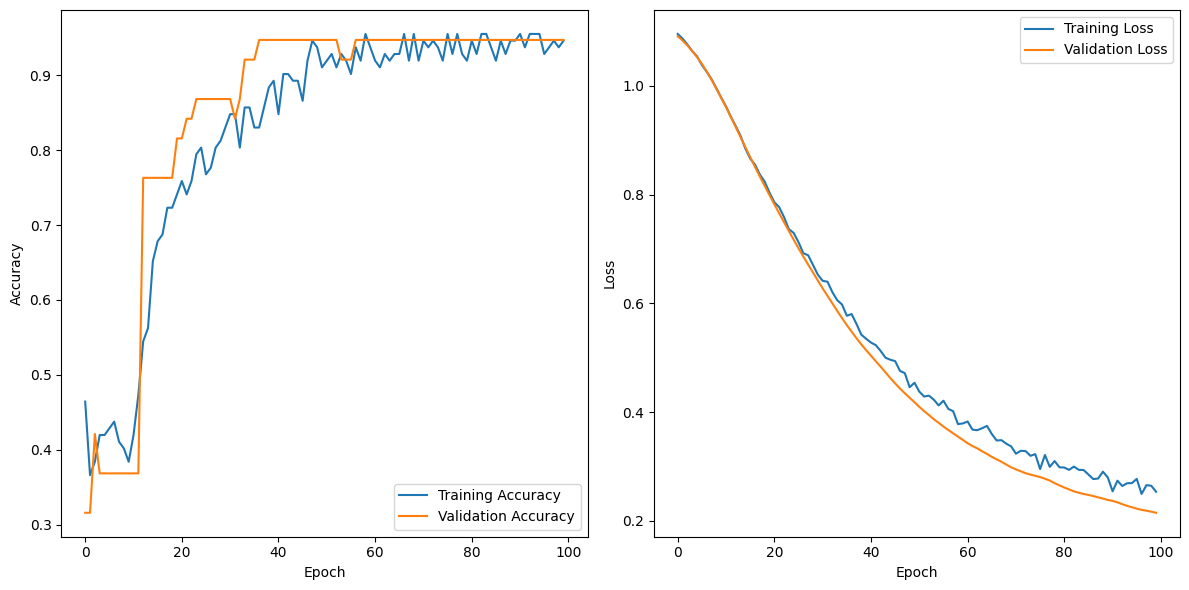

In [ ]:
# Plot training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(H.history['accuracy'], label='Training Accuracy')
plt.plot(H.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(H.history['loss'], label='Training Loss')
plt.plot(H.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Classification Report

In [ ]:

print("[INFO] evaluating after fine-tuning...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=classNames))

[INFO] evaluating after fine-tuning...
2/2 [==============================] - 0s 18ms/step
              precision    recall  f1-score   support

      normal       1.00      1.00      1.00        15
      stage1       0.85      1.00      0.92        11
      stage2       1.00      0.83      0.91        12

    accuracy                           0.95        38
   macro avg       0.95      0.94      0.94        38
weighted avg       0.96      0.95      0.95        38



Confusion Matrix:


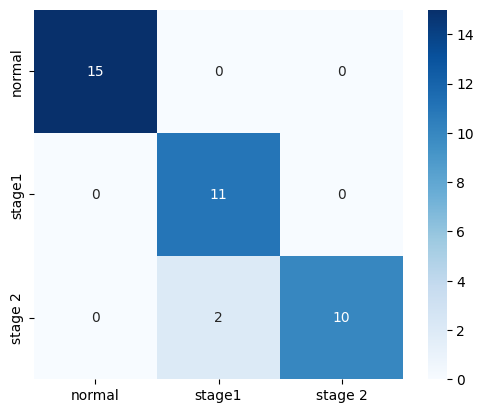

In [ ]:
from sklearn.metrics import pair_confusion_matrix,confusion_matrix
import seaborn as sns
classnames = ["normal","stage1","stage 2"]
print('Confusion Matrix:')
CM = confusion_matrix(testY.argmax(axis=1),predictions.argmax(axis=1))
# drawing confusion matrix
sns.heatmap(CM, square = True , annot=True, fmt="d" ,cmap="Blues", xticklabels=classnames, yticklabels=classnames)
plt.show()

In [ ]:
# metrics calculation
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
accuracy = accuracy_score(predictions.argmax(axis = 1),testY.argmax(axis = 1))
precision = precision_score(predictions.argmax(axis = 1),testY.argmax(axis = 1),average = "weighted")
recall = recall_score(predictions.argmax(axis = 1),testY.argmax(axis = 1),average = "weighted")
f1_score = f1_score(predictions.argmax(axis = 1),testY.argmax(axis = 1),average = "weighted")

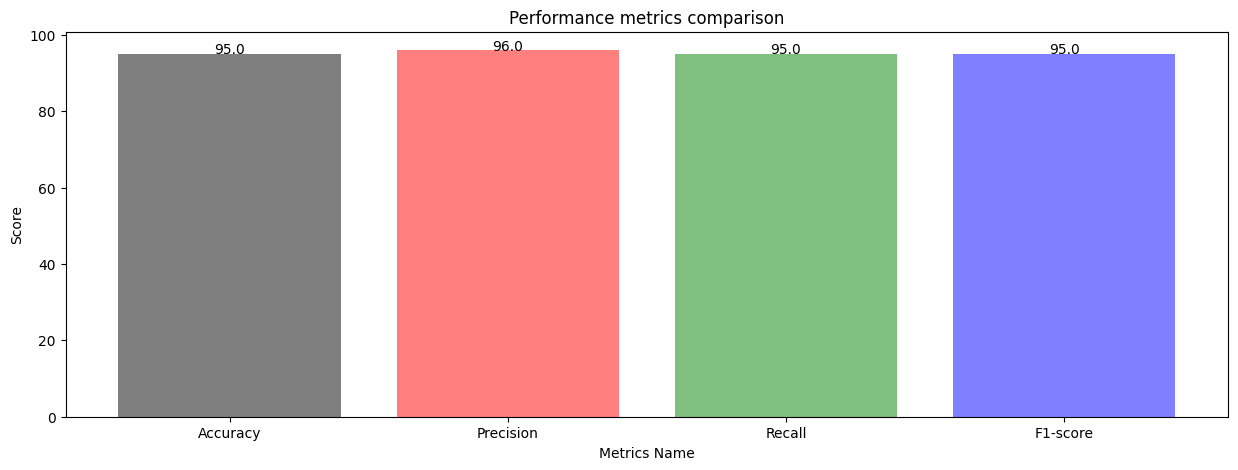

In [ ]:
Accuracy = [round(accuracy,2)*100,round(precision,2)*100,round(recall,2)*100,round(f1_score,2)*100]
objects =  ('Accuracy', 'Precision','Recall','F1-score')
y_pos = np.arange(len(objects))
plt.figure(figsize = (15,5))
plt.bar(y_pos, Accuracy, align='center', alpha=0.5,color = ['black', 'red', 'green', 'blue'])
plt.xticks(y_pos, objects)
plt.ylabel('Score')
plt.xlabel('Metrics Name')
plt.title('Performance metrics comparison')

# Insert data labels above each bar
for i, value in enumerate(Accuracy):
    plt.text(i, value+0.01, str(value), ha='center')
plt.show()


run

Prediciton

In [ ]:
!unzip /content/gdrive/MyDrive/Gastric_Cancer_Project/gastric_test_data.zip -d .

Archive:  /content/gdrive/MyDrive/Gastric_Cancer_Project/gastric_test_data.zip
   creating: ./gastric_test_data/
  inflating: ./gastric_test_data/image_0_5459.jpg  
  inflating: ./gastric_test_data/image_0_6048.jpg  
  inflating: ./gastric_test_data/image_0_6541.jpg  
  inflating: ./gastric_test_data/image_0_6681.jpg  
  inflating: ./gastric_test_data/image_0_6844.jpg  
  inflating: ./gastric_test_data/image_0_6851.jpg  
  inflating: ./gastric_test_data/image_0_6866.jpg  
  inflating: ./gastric_test_data/image_0_6994.jpg  
  inflating: ./gastric_test_data/image_0_7081.jpg  
  inflating: ./gastric_test_data/image_0_7155.jpg  
  inflating: ./gastric_test_data/image_0_7420.jpg  
  inflating: ./gastric_test_data/image_0_7512.jpg  
  inflating: ./gastric_test_data/image_0_7619.jpg  
  inflating: ./gastric_test_data/image_0_8027.jpg  
  inflating: ./gastric_test_data/image_0_8192.jpg  
  inflating: ./gastric_test_data/image_0_8547.jpg  
  inflating: ./gastric_test_data/image_0_8808.jpg  
  i

In [ ]:
class AspectAwarePreprocessor:
	def __init__(self, width, height, inter=cv2.INTER_AREA):
		# store the target image width, height, and interpolation
		# method used when resizing
		self.width = width
		self.height = height
		self.inter = inter

	def preprocess(self, image):
		# grab the dimensions of the image and then initialize
		# the deltas to use when cropping
		(h, w) = image.shape[:2]
		dW = 0
		dH = 0

		# if the width is smaller than the height, then resize
		# along the width (i.e., the smaller dimension) and then
		# update the deltas to crop the height to the desired
		# dimension
		if w < h:
			image = imutils.resize(image, width=self.width,
				inter=self.inter)
			dH = int((image.shape[0] - self.height) / 2.0)

		# otherwise, the height is smaller than the width so
		# resize along the height and then update the deltas
		# crop along the width
		else:
			image = imutils.resize(image, height=self.height,
				inter=self.inter)
			dW = int((image.shape[1] - self.width) / 2.0)

		# now that our images have been resized, we need to
		# re-grab the width and height, followed by performing
		# the crop
		(h, w) = image.shape[:2]
		image = image[dH:h - dH, dW:w - dW]

		# finally, resize the image to the provided spatial
		# dimensions to ensure our output image is always a fixed
		# size
		return cv2.resize(image, (self.width, self.height),
			interpolation=self.inter)

In [ ]:
class SimpleDatasetLoader:
	def __init__(self, preprocessors=None):
		# store the image preprocessor
		self.preprocessors = preprocessors

		# if the preprocessors are None, initialize them as an
		# empty list
		if self.preprocessors is None:
			self.preprocessors = []

	def load(self, imagePaths, verbose=-1):
		# initialize the list of features and labels
		data = []
		labels = []

		# loop over the input images
		for (i, imagePath) in enumerate(imagePaths):
			# load the image and extract the class label assuming
			# that our path has the following format:
			# /path/to/dataset/{class}/{image}.jpg
			image = cv2.imread(imagePath)


			# check to see if our preprocessors are not None
			if self.preprocessors is not None:
				# loop over the preprocessors and apply each to
				# the image
				for p in self.preprocessors:
					image = p.preprocess(image)

			# treat our processed image as a "feature vector"
			# by updating the data list followed by the labels
			data.append(image)

			# show an update every `verbose` images
			if verbose > 0 and i > 0 and (i + 1) % verbose == 0:
				print("[INFO] processed {}/{}".format(i + 1,
					len(imagePaths)))

		# return a tuple of the data and labels
		return (np.array(data))

In [ ]:
class ImageToArrayPreprocessor:
	def __init__(self, dataFormat=None):
		# store the image data format
		self.dataFormat = dataFormat

	def preprocess(self, image):
		# apply the Keras utility function that correctly rearranges
		# the dimensions of the image
		return img_to_array(image, data_format=self.dataFormat)

In [ ]:
seg_model = load_model('/content/gdrive/MyDrive/Gastric_Cancer_Project/segementation_weight.h5')
class_model = tf.keras.models.load_model('/content/gdrive/MyDrive/Gastric_Cancer_Project/class.h5')

1/1 [==============================] - 0s 33ms/step
stage1


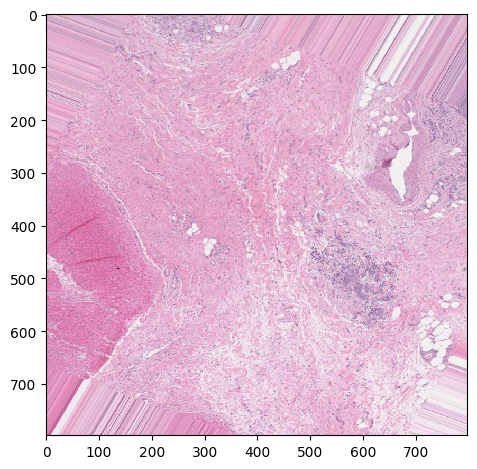

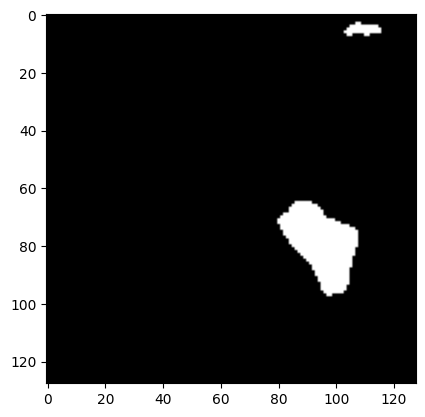

In [ ]:
from PIL import Image
imgs11 = '/content/gastric_test_data/image_0_8027.jpg'
X_test1 = np.zeros((1, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
sizes_test1 = []
img1 = imread(imgs11)[:,:,:IMG_CHANNELS]

sizes_test1.append([img1.shape[0], img1.shape[1]])
img1 = resize(img1, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
X_test1[0] = img1

# #Predict on train, val and test
# model = load_model('/content/gdrive/MyDrive/gastric cancer/seg_weight.h5')

preds_test = seg_model.predict(X_test1, verbose=1)
fig=plt.figure()
imshow(imgs11)

fig=plt.figure()
plt.imshow(X_test1[0])

preds_test_upsampled1=[]
preds_test_t = (preds_test > 0.5).astype(np.uint8)
preds_test_upsampled1.append(resize(np.squeeze(preds_test_t[0]),  (sizes_test1[0][0], sizes_test1[0][1]), mode='constant',
       preserve_range=True))

plt.imshow(np.squeeze(preds_test_t[0]),cmap='gray');


# Save mask image
mask_image_path = "/content/testmask.jpg"
image = Image.fromarray((preds_test_upsampled1[0] * 255).astype(np.uint8), 'L')
image.save(mask_image_path)


onesegmask=['testmask.jpg']

aap = AspectAwarePreprocessor(64,64)
iap = ImageToArrayPreprocessor()

sdl = SimpleDatasetLoader(preprocessors=[aap, iap])
data = sdl.load(onesegmask, verbose=500)
data = data.astype("float") / 255.0

preds = class_model.predict(data).argmax(axis=1)

classNames=['normal','stage1','stage2']
print(classNames[preds[0]])